# Python для анализа данных

*Алла Тамбовцева, НИУ ВШЭ*

## Web-scraping

Мы уже немного познакомились со структурой html-файлов, теперь попробуем выгрузить информацию из реальной страницы, а точнее, с реального сайта [nplus1.ru](https://nplus1.ru/).

**Наша задача:** выгрузить недавние новости в датафрейм `pandas`, чтобы потом сохранить все в csv-файл.

Сначала сгрузим весь html-код страницы и сохраним его в отдельную переменную. Для этого нам понадобится библиотека `requests`. Импортируем её:

In [1]:
import requests

Сохраним ссылку на главную страницу сайта в переменную `url` для удобства и выгрузим страницу. (Разумеется, это будет работать при подключении к интернету. Если соединение будет отключено, Python выдаст `NewConnectionError`).

In [2]:
url = 'https://nplus1.ru/' # сохраняем
page = requests.get(url) # загружаем страницу по ссылке

Если мы просто посмотрим на объект, мы ничего особенного не увидим:

In [3]:
page  # response 200 - страница загружена

<Response [200]>

In [4]:
# page.text

Импортируем функцию `BeautifulSoup` из библиотеки `bs4` (от *beautifulsoup4*) и заберём со страницы `page` код html в виде текста. 

In [5]:
from bs4 import BeautifulSoup  # не спрашивайте, почему BeautifulSoup

In [6]:
soup = BeautifulSoup(page.text, 'html')

Если выведем `soup` на экран, мы увидим то же самое, что в режиме разработчика или в режиме происмотра исходного кода (`view-source` через *Ctrl+U* в Google Chrome).

In [7]:
# soup

Для просмотра выглядит не очень удобно.  «Причешем» наш `soup` – воспользуемся методом `.prettify()` в сочетании с функцией `print()`.

In [8]:
# print(soup.prettify())

В такой выдаче ориентироваться гораздо удобнее (но при желании, то же можно увидеть в браузере, на большом экране).


Чтобы сгрузить все новости с главной страницы сайта, нужно собрать все ссылки на страницы с этими новостями. Ссылки в html-файле всегда заключены в тэг `<a></a>` и имеют атрибут `href`. Посмотрим на кусочки кода, соответствующие всем ссылкам на главной странице сайта:

In [9]:
for link in soup.find_all('a'):
    print(link.get('href'))
#     break

/search
https://offline.nplus1.ru/
https://nplus.pro/
https://nplus1.ru/about
https://nplus1.ru/difficult
https://nplus1.ru/adv
https://nplus1.ru/blog/2022/04/01/samotek
https://nplus1.ru/search?tags=946
https://nplus1.ru/search?tags=869
https://nplus1.ru/search?tags=874
https://nplus1.ru/search?tags=880
https://nplus1.ru/search?tags=768
https://nplus1.ru/search?tags=890
https://nplus1.ru/search?tags=871
https://nplus1.ru/search?tags=876
https://nplus1.ru/search?tags=775
https://nplus1.ru/search?tags=767
https://nplus1.ru/search?tags=771
https://nplus1.ru/search?tags=772
https://nplus1.ru/search?tags=778
https://nplus1.ru/search?tags=917
https://nplus1.ru/search?tags=918
https://nplus1.ru/search?tags=824
https://t.me/nplusone
https://vk.com/nplusone
https://ok.ru/nplus1
https://twitter.com/nplusodin
https://nplus1.ru/about
https://nplus1.ru/difficult
https://nplus1.ru/adv
https://nplus1.ru/news/2015/09/21/editor-thy-name
https://nplus1.ru/search?tags=946
https://nplus1.ru/search?tags=8

Ссылок много. Но нам нужны только новости – ссылки, которые начинаются со слова `/news`. Добавим условие: будем выбирать только те ссылки, в которых есть `/news`. Создадим пустой список `urls` и будем добавлять в него только ссылки, которые удовлетворяют этому условию.

In [10]:
# urls = []

# for link in soup.find_all('a'):
#     if '/news' in link.get('href'):
#         urls.append('https://nplus1.ru'+link.get('href'))

urls = [link.get('href') 
        for link in soup.find_all('a') 
        if 'https://nplus1.ru/news/2023' in link.get('href')]

Ссылки, которые у нас есть в списке `urls`, относительные: они неполные, начало ссылки (название сайта) отсутствует. Давайте превратим их в абсолютные ‒ склеим с ссылкой https://nplus1.ru.

In [11]:
urls[:5]

['https://nplus1.ru/news/2023/10/04/chem-nobel-2023',
 'https://nplus1.ru/news/2023/10/05/joby-taxi-first-flight-with-pilot',
 'https://nplus1.ru/news/2023/10/05/bluewalker-3-is-danger',
 'https://nplus1.ru/news/2023/10/05/el-nino-lapita',
 'https://nplus1.ru/news/2023/10/05/manganese-accumulation-in-the-brain']

In [12]:
full_urls = []

for u in urls:
    full_urls.append(u) 

full_urls

['https://nplus1.ru/news/2023/10/04/chem-nobel-2023',
 'https://nplus1.ru/news/2023/10/05/joby-taxi-first-flight-with-pilot',
 'https://nplus1.ru/news/2023/10/05/bluewalker-3-is-danger',
 'https://nplus1.ru/news/2023/10/05/el-nino-lapita',
 'https://nplus1.ru/news/2023/10/05/manganese-accumulation-in-the-brain',
 'https://nplus1.ru/news/2023/10/04/sulfur-of-deccan-traps',
 'https://nplus1.ru/news/2023/10/04/heartbreaking',
 'https://nplus1.ru/news/2023/10/04/osiris-rex-deploy-capsule',
 'https://nplus1.ru/news/2023/10/04/vehicle-crash-adhd',
 'https://nplus1.ru/news/2023/10/04/same-sex-behaviour-mammals',
 'https://nplus1.ru/news/2023/10/04/frb-gw-or-no',
 'https://nplus1.ru/news/2023/10/04/ak-alakha',
 'https://nplus1.ru/news/2023/10/04/second-vaccine-for-malaria',
 'https://nplus1.ru/news/2023/10/04/neolithic-jericho',
 'https://nplus1.ru/news/2023/10/04/we-drive-solar-sharing-batteries',
 'https://nplus1.ru/news/2023/10/04/orca-vs-sea-otters',
 'https://nplus1.ru/news/2023/10/03/wol

Теперь наша задача сводится к следующему: изучить одну страницу с новостью, научиться из нее вытаскивать текст и всю необходимую информацию, а потом применить весь набор действий к каждой ссылке из `full_urls` в цикле. Посмотрим на новость с индексом 1, у вас может быть другая, новости обновляются.

In [13]:
url0 = urls[0]

page0 = requests.get(url0)
soup0 = BeautifulSoup(page0.text, 'html')

In [14]:
url0

'https://nplus1.ru/news/2023/10/04/chem-nobel-2023'

В коде каждой страницы с новостью есть часть с мета-информацией: датой, именем автора и проч. Такая информация окружена тэгом `<meta></meta>`. Посмотрим:

In [15]:
soup0.find_all('meta')

[<meta charset="utf-8"/>,
 <meta content="width=device-width, initial-scale=1" name="viewport"/>,
 <meta content="#f26e40" name="msapplication-TileColor"/>,
 <meta content="#ffffff" name="theme-color"/>,
 <meta content="8c90b02c84ac3b72" name="yandex-verification"/>,
 <meta content="b419949322895fc9106e24ed01be58ac" name="pmail-verification"/>,
 <meta content="N + 1 — главное издание о науке, технике и технологиях" name="description"/>,
 <meta content="N + 1 — главное издание о науке, технике и технологиях" property="og:site_name"/>,
 <meta content="Нобелевскую премию по химии присудили за квантовые точки" property="og:title"/>,
 <meta content="https://minio.nplus1.ru/app-images/838971/6516cd4f91d3b_cover_share.jpg" property="og:image"/>,
 <meta content="https://nplus1.ru/news/2023/10/04/chem-nobel-2023" property="og:url"/>,
 <meta content="N + 1 — главное издание о науке, технике и технологиях" property="og:description"/>,
 <meta content="article" property="og:type"/>,
 <meta content=

Из этого списка нам нужны части с именем автора, датой, заголовком и кратким описанием. Воспользуемся поиском по атрибуту `name`. Передадим функции `find_all()` в качестве аргумента словарь с названием и значением атрибута: 

In [16]:
soup0.find_all('meta', {'name' : 'author'}) # например, автор

[<meta content="Михаил Бойм" name="author"/>]

Теперь выберем единственный элемент полученного списка (с индексом 0):

In [17]:
soup0.find_all('meta', {'name' : 'author'})[0]

<meta content="Михаил Бойм" name="author"/>

Нам нужно вытащить из этого объекта `content` – имя автора. Посмотрим на атрибуты:

In [18]:
soup0.find_all('meta', {'name' : 'author'})[0].get('content')

'Михаил Бойм'

Как получить отсюда `content`? Очень просто, ведь это словарь! А доставать из словаря значение по ключу мы умеем.

In [19]:
author = soup0.find_all('meta', {'name' : 'author'})[0].attrs
author

{'name': 'author', 'content': 'Михаил Бойм'}

Аналогичным образом извлечем дату, заголовок и описание.

In [20]:
soup0.find_all('meta', {'property' : 'og:title'})[0].get('content')

'Нобелевскую премию по\xa0химии присудили за\xa0квантовые точки'

In [21]:
date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].get('content')
title = soup0.find_all('meta', {'property' : 'og:title'})[0].get('content')
description = soup0.find_all('h1', {'class':'text-34 md:text-42 xl:text-52 break-words'})[0].get_text().strip() \
+ '\n' + soup0.find_all('p', {'class':"text-36 md:text-44 xl:text-54 font-spectral text-main-gray mb-6"})[0].get_text().strip()



In [22]:
description

'Нобелевскую премию по\xa0химии присудили за\xa0квантовые точки\nЕе\xa0получат Мунги Бавенди, Луис Брюс и\xa0Алексей Екимов'

Осталось вытащить рубрики и сложность текста. Если мы посмотрим на исходный код страницы, мы увидим, что нужная нам информация находится в тэгах `<p></p>`:

In [23]:
new_data = soup0.find_all('div', {'class':"flex flex-wrap lg:mb-10 gap-2 text-tags xl:pr-9"})[0].find_all('span')[1:]

time_published = new_data[0].get_text()
date_published = new_data[1].get_text()
complexity = new_data[2].get_text()
themes = ', '.join(i.get_text() for i in new_data[3:])

In [24]:
new_data

[<span class="group-hover:text-main transition-colors duration-75">12:54</span>,
 <span class="group-hover:text-main transition-colors duration-75">04.10.23</span>,
 <span class="group-hover:text-main transition-colors duration-75">4.9</span>,
 <span class="group-hover:text-main transition-colors duration-75">Химия</span>]

In [25]:
paragraphs = soup0.find_all('p', {'class': 'mb-6'})[1:]


In [26]:
paragraphs

[<p class="mb-6">Лауреатами Нобелевской премии по химии 2023 года стали Мунги Бавенди (Moungi G. Bawendi), Луис Брюс (Louis E. Brus) и Алексей Екимов (Alexei I. Ekimov) — за открытие и исследование квантовых точек. За церемонией вручения премии можно наблюдать в прямом эфире на <a href="https://www.nobelprize.org/">сайте</a> Нобелевского комитета. Подробнее об исследованиях лауреатов рассказывает <a href="https://www.nobelprize.org/prizes/chemistry/2023/press-release/">пресс-релиз</a>. Вручение премий состоится 10 декабря в Стокгольме.</p>,
 <p class="mb-6">Квантовые точки представляют собой кристаллические полупроводниковые частицы размером в несколько нанометров. Из-за своего небольшого размера, их оптические свойства во многом определяются квантовыми эффектами, и поэтому они сильно отличаются от макрокристаллических полупроводников. В частности, разница между энергетическими уровнями валентных электронов и электронов проводимости в квантовых точках отличается от ширины запрещенной з

In [27]:
links = set()
for p in paragraphs:
    links|={i.get('href') for i in p.find_all('a')}
links = ', '.join(links)

In [28]:
full_text = '\n'.join([p.get_text() for p in paragraphs])

Не прошло и двух пар, как мы разобрались со всем :) Теперь осталось совсем чуть-чуть. Написать готовую функцию для всех проделанных нами действий и применить ее в цикле для всех ссылок в списке `full_urls`. Напишем! Аргументом функции будет ссылка на новость, а возвращать она будет текст новости и всю необходимую информацию (дата, автор, сложность и проч.). Скопируем все строки кода выше.

In [29]:
def GetNews(url0):
    """
    Returns a tuple with 
    url0, date_published, time_published, author, description, title, complexity, themes, links,full_text
    Parameters:
    
    url0 is a link to the news (string)
    """
    page0 = requests.get(url0)
    soup0 = BeautifulSoup(page0.text, 'lxml')
    
    author = soup0.find_all('meta', {'name' : 'author'})[0].get('content')
    date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].get('content')
    title = soup0.find_all('meta', {'property' : 'og:title'})[0].get('content')
    description = soup0.find_all('h1', {'class':'text-34 md:text-42 xl:text-52 break-words'})[0].get_text().strip() \
+ '\n' + soup0.find_all('p', {'class':"text-36 md:text-44 xl:text-54 font-spectral text-main-gray mb-6"})[0].get_text().strip()


    
    new_data = soup0.find_all('div', {'class':"flex flex-wrap lg:mb-10 gap-2 text-tags xl:pr-9"})[0].find_all('span')[1:]

    time_published = new_data[0].get_text()
    date_published = new_data[1].get_text()
    complexity = new_data[2].get_text()
    themes = ', '.join(i.get_text() for i in new_data[3:])
    
    paragraphs = soup0.find_all('p', {'class': 'mb-6'})[1:]
    links = set()
    for p in paragraphs:
        links|={i.get('href') for i in p.find_all('a')}
    links -= {None} # Если вдруг у нас есть None-ссылка
    links = ', '.join(links)
    full_text = '\n'.join([p.get_text() for p in paragraphs])
    
    return url0, date_published, time_published, author, description, title, complexity, themes, links,full_text

Уфф. Осталось применить ее в цикле. Но давайте не будем спешить: импортируем функцию `sleep` для задержки, чтобы на каждой итерации цикла, прежде чем перейти к следующей новости, Python ждал несколько секунд. Во-первых, это нужно, чтобы сайт «не понял», чтобы мы его грабим, да еще автоматически. Во-вторых, с небольшой задержкой всегда есть гарантия, что страница прогрузится (сейчас это пока не очень важно, но особенно актуально будет, когда будем обсуждать встраивание в браузер с Selenium). Приступим.

In [30]:
from time import sleep
from tqdm import tqdm

In [31]:
import random

In [32]:
news = [] # это будет список из кортежей, в которых будут храниться данные по каждой новости

for link in tqdm(urls):
    res = GetNews(link)
    news.append(res)
    sleep(random.random()) # задержка в 3 секунды

100%|██████████████████████████████████████████████████████████████████████████████████| 54/54 [01:08<00:00,  1.27s/it]


In [33]:
urls[50]

'https://nplus1.ru/news/2023/09/23/jwst-europe-co2'

In [34]:
page0 = requests.get(urls[50])
soup0 = BeautifulSoup(page0.text, 'lxml')

In [35]:
paragraphs = soup0.find_all('p', {'class': 'mb-6'})[1:]

In [36]:
links = set()
for p in paragraphs:
    links|={i.get('href') for i in p.find_all('a')}

In [37]:
links - {None}

{'https://it.wikipedia.org/wiki/Powys_Regio',
 'https://it.wikipedia.org/wiki/Tara_Regio',
 'https://nplus1.ru/material/2023/04/12/juice-jupiter',
 'https://nplus1.ru/news/2016/09/26/europa-ocean-hubble',
 'https://nplus1.ru/news/2019/06/13/nacl-in-europe',
 'https://nplus1.ru/news/2020/06/25/europa-ocean',
 'https://nplus1.ru/news/2021/07/24/falcon-for-cliper',
 'https://nplus1.ru/news/2022/06/30/swin-mission',
 'https://ru.wikipedia.org/wiki/%D0%A5%D0%B0%D0%BE%D1%81_(%D1%80%D0%B5%D0%BB%D1%8C%D0%B5%D1%84)',
 'https://www.science.org/doi/10.1126/science.adg4155',
 'https://www.science.org/doi/10.1126/science.adg4270'}

Так теперь выглядит первый элемент списка:

In [38]:
news[0]

('https://nplus1.ru/news/2023/10/04/chem-nobel-2023',
 '04.10.23',
 '12:54',
 'Михаил Бойм',
 'Нобелевскую премию по\xa0химии присудили за\xa0квантовые точки\nЕе\xa0получат Мунги Бавенди, Луис Брюс и\xa0Алексей Екимов',
 'Нобелевскую премию по\xa0химии присудили за\xa0квантовые точки',
 '4.9',
 'Химия',
 'https://www.nobelprize.org/prizes/chemistry/2023/press-release/, https://pubs.aip.org/aip/jcp/article-abstract/79/2/1086/776583/Quantum-size-effects-in-the-redox-potentials?redirectedFrom=fulltext, https://nplus1.ru/material/2022/10/06/chemistry-nobel-2022, https://nplus1.ru/material/2021/10/07/nobel-chem-2021, https://www.nobelprize.org/, https://web.archive.org/web/20141216142832/http://www.jetpletters.ac.ru/ps/1030/article_15644.pdf, https://www.prnewswire.com/news-releases/thomson-reuters-predicts-2012-nobel-laureates-170285846.html, https://clarivate.com/news/clarivate-reveals-2020-citation-laureates-annual-list-of-researchers-of-nobel-class/, https://nplus1.ru/blog/2023/09/20/cl

Импортируем `pandas` и создадим датафрейм из списка кортежей: 

In [39]:
import pandas as pd

In [40]:
df = pd.DataFrame(news)

In [41]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9
0,https://nplus1.ru/news/2023/10/04/chem-nobel-2023,04.10.23,12:54,Михаил Бойм,Нобелевскую премию по химии присудили за квант...,Нобелевскую премию по химии присудили за квант...,4.9,Химия,https://www.nobelprize.org/prizes/chemistry/20...,Лауреатами Нобелевской премии по химии 2023 го...
1,https://nplus1.ru/news/2023/10/05/joby-taxi-fi...,05.10.23,13:47,Андрей Фокин,Аэротакси Joby впервые взлетело с пилотом на б...,Аэротакси Joby впервые взлетело с пилотом на б...,1.7,"Авиация, Транспорт, Технологии","https://wbsrv.ru/, https://nplus1.ru/news/2021...","Компания Joby Aviation, занимающаяся разработк..."


Переименуем столбцы в базе.

In [42]:
df.columns = ['url', 'date_published', 'time_published', 'author', 'description', 'title', 'complexity', 'themes', 'links','full_text']

Теперь внесем изменения: сделаем столбец `diffc` числовым – типа *float*.

In [43]:
df['complexity'] = df['complexity'].apply(float)

Теперь сложность представлена в базе как количественный показатель, и описывать ее можно соответствующим образом:

In [44]:
df.complexity.describe()

count    54.000000
mean      3.318519
std       1.753818
min       1.100000
25%       1.950000
50%       2.850000
75%       4.475000
max       7.800000
Name: complexity, dtype: float64

In [45]:
from matplotlib.cbook import flatten

In [46]:
sorted(set(flatten([i.split(', ') for i in df.themes.unique()])))

['Авиация',
 'Антропология',
 'Археология',
 'Астрономия',
 'Биология',
 'Ботаника',
 'Геология',
 'Зоология',
 'Инфопартнерство',
 'История',
 'Космонавтика',
 'Лингвистика',
 'Медицина',
 'Роботы и дроны',
 'Технологии',
 'Транспорт',
 'Физика',
 'Химия',
 'Экология и климат']

In [47]:
df[df.themes.apply(lambda x: 'зоология' in x.lower())].sample(1).full_text.values[0]

'На\xa0планете живет не\xa0восемь, а\xa0девять видов панголинов. К\xa0такому выводу пришли зоологи, проанализировав 33\xa0образца панголиньих чешуек, конфискованных у\xa0контрабандистов в\xa0Гонконге и\xa0Юньнане с\xa02012 по\xa02019\xa0годы. Генетический анализ показал, что эти чешуйки принадлежали неизвестному ранее виду азиатских панголинов, который приходится родственником яванскому и\xa0филиппинскому панголинам, но\xa0разошелся с\xa0ними около пяти миллионов лет назад. Его назвали загадочным панголином (Manis mysteria). Где обитает этот вид и\xa0как именно выглядит, неизвестно. Результаты исследования опубликованы в\xa0статье для журнала Proceedings of\xa0the National Academy of\xa0Sciences.\nЗоологам известны восемь современных видов панголинов (Pholidota)\xa0— необычных насекомоядных млекопитающих, покрытых кератиновой чешуей. Четыре из\xa0них обитают в\xa0Азии, а\xa0еще четыре\xa0— в\xa0Африке. К\xa0сожалению, в\xa0наши дни все они оказались под угрозой вымирания. Основной угро

In [48]:
df.to_csv('news_plus_1.csv', 
          index = False, 
          sep = ';',  #  Сюда можно поставить произвольный символ, чтоб новость не ломать
          encoding = 'utf-8-sig')

Теперь столбец со сложностью точно числовой. Можем даже построить для него гистограмму.

<AxesSubplot:ylabel='Frequency'>

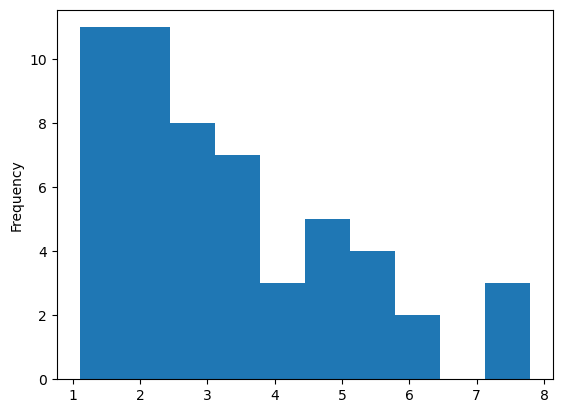

In [49]:
%matplotlib inline
df.complexity.plot.hist()

Осталось только заменить непонятные символы `\xa0` на пробелы:

In [50]:
df['clean_text'] = [t.replace("\xa0", " ") for t in df.full_text]

In [51]:
df.clean_text[0]

'Лауреатами Нобелевской премии по химии 2023 года стали Мунги Бавенди (Moungi G. Bawendi), Луис Брюс (Louis E. Brus) и Алексей Екимов (Alexei I. Ekimov) — за открытие и исследование квантовых точек. За церемонией вручения премии можно наблюдать в прямом эфире на сайте Нобелевского комитета. Подробнее об исследованиях лауреатов рассказывает пресс-релиз. Вручение премий состоится 10 декабря в Стокгольме.\nКвантовые точки представляют собой кристаллические полупроводниковые частицы размером в несколько нанометров. Из-за своего небольшого размера, их оптические свойства во многом определяются квантовыми эффектами, и поэтому они сильно отличаются от макрокристаллических полупроводников. В частности, разница между энергетическими уровнями валентных электронов и электронов проводимости в квантовых точках отличается от ширины запрещенной зоны в объемном полупроводнике, и сильно зависит от размера частицы. Поэтому свойства квантовых точек можно менять, варьируя их размер.\nПервым квантовые точк

Всё! Сохраняем датафрейм в файл. Для разнообразия сохраним в Excel:

In [52]:
df.to_excel('nplus-news.xlsx')